In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Ссылка на сам набор данных https://api.opendota.com/api/heroes. Источник: https://www.opendota.com/

In [4]:
dota_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col = 'id')

In [8]:
dota_df.head(10)

,Unnamed: 0,attack_type,legs,localized_name,name,primary_attr,roles
id,,,,,,,
1,0,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
2,1,Melee,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
3,2,Ranged,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
4,3,Melee,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
5,4,Ranged,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
6,5,Ranged,2,Drow Ranger,npc_dota_hero_drow_ranger,agi,"['Carry', 'Disabler', 'Pusher']"
7,6,Melee,2,Earthshaker,npc_dota_hero_earthshaker,str,"['Support', 'Initiator', 'Disabler', 'Nuker']"
8,7,Melee,2,Juggernaut,npc_dota_hero_juggernaut,agi,"['Carry', 'Pusher', 'Escape']"
9,8,Ranged,2,Mirana,npc_dota_hero_mirana,agi,"['Carry', 'Support', 'Escape', 'Nuker', 'Disab..."


In [5]:
dota_df.drop(columns = ['Unnamed: 0'], inplace = True)
dota_df.head(10)

,attack_type,legs,localized_name,name,primary_attr,roles
id,,,,,,
1,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
2,Melee,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
3,Ranged,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
4,Melee,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
5,Ranged,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
6,Ranged,2,Drow Ranger,npc_dota_hero_drow_ranger,agi,"['Carry', 'Disabler', 'Pusher']"
7,Melee,2,Earthshaker,npc_dota_hero_earthshaker,str,"['Support', 'Initiator', 'Disabler', 'Nuker']"
8,Melee,2,Juggernaut,npc_dota_hero_juggernaut,agi,"['Carry', 'Pusher', 'Escape']"
9,Ranged,2,Mirana,npc_dota_hero_mirana,agi,"['Carry', 'Support', 'Escape', 'Nuker', 'Disab..."


Выполним преобразование категориального признака `attack_type` в числовой:

In [7]:
attype = {'Melee' : 0, 'Ranged': 1}
dota_df['attack_type_le'] = dota_df['attack_type'].map(attype)
dota_df.head(10)

,attack_type,legs,localized_name,name,primary_attr,roles,attack_type_le
id,,,,,,,
1,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",0
2,Melee,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",0
3,Ranged,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",1
4,Melee,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",0
5,Ranged,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",1
6,Ranged,2,Drow Ranger,npc_dota_hero_drow_ranger,agi,"['Carry', 'Disabler', 'Pusher']",1
7,Melee,2,Earthshaker,npc_dota_hero_earthshaker,str,"['Support', 'Initiator', 'Disabler', 'Nuker']",0
8,Melee,2,Juggernaut,npc_dota_hero_juggernaut,agi,"['Carry', 'Pusher', 'Escape']",0
9,Ranged,2,Mirana,npc_dota_hero_mirana,agi,"['Carry', 'Support', 'Escape', 'Nuker', 'Disab...",1


Посмотрим на распределение возможных ролей в игре (колонка roles), создадим новую колонку, отвечающую за количество ролей каждого игрока:

In [8]:
dota_df['cnt'] = dota_df.roles.str.count(',') + 1

Посмотрим на данные:

In [9]:
dota_df.head(10)

,attack_type,legs,localized_name,name,primary_attr,roles,attack_type_le,cnt
id,,,,,,,,
1,Melee,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",0,3
2,Melee,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",0,4
3,Ranged,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",1,4
4,Melee,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",0,5
5,Ranged,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",1,4
6,Ranged,2,Drow Ranger,npc_dota_hero_drow_ranger,agi,"['Carry', 'Disabler', 'Pusher']",1,3
7,Melee,2,Earthshaker,npc_dota_hero_earthshaker,str,"['Support', 'Initiator', 'Disabler', 'Nuker']",0,4
8,Melee,2,Juggernaut,npc_dota_hero_juggernaut,agi,"['Carry', 'Pusher', 'Escape']",0,3
9,Ranged,2,Mirana,npc_dota_hero_mirana,agi,"['Carry', 'Support', 'Escape', 'Nuker', 'Disab...",1,5


Построим гистограмму, которая отображает, скольким героям сколько ролей принадлежит:

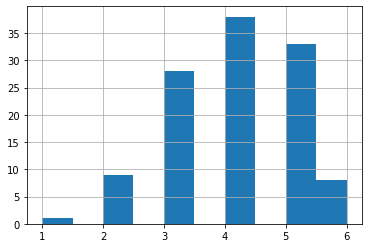

In [10]:
dota_df['cnt'].hist()

Можно сделать вывод, что у большинства игроков по 4 роли.